# Machine Learning: Assignment 2
## KMeans clustering (max. 7p)

**Remember** to write your information below.

In [78]:
# TODO: Write your information here!
student_name = 'Phat Vuong'
student_email = "ac4933@student.jamk.fi"

## Assignment 2.0: KMeans assignment
### Unsupervised learning
In the assignment, three (3) distinct clusters are generated using **synthetic values** of X and y coordinates.

These can be drawn in the (X,Y) coordinate system.

Mean distance of cluster 0: 24.76
Mean distance of cluster 1: 19.91
Mean distance of cluster 2: 20.66


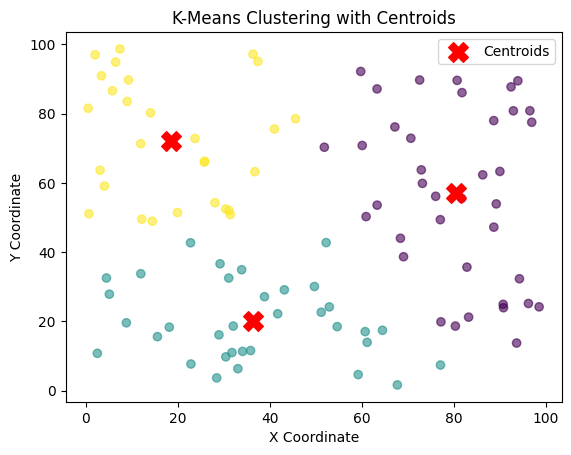

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):    
    #  TODO: Function implementation to calculate the mean of distances of cluster centroids
    """
    Compute the mean distance of points in a cluster from its centroid

    Parameters:
    data (ndarray): Array of data points, shape(n_samples, 2) for (X, Y).
    cx (ndarray): X-coordinates of centroids
    cy (ndarray): Y-coordinates of centroids
    i_centroid (int): Index of the centroid
    cluster_labels (ndarray): Array of cluster assignments for each point

    Returns:
        float: The man distance of all points in the cluster from its centroid.
    """

    # Extract points belonging to the given centroid
    cluster_points = data[cluster_labels == i_centroid]

    # Compute the Euclidean distance from the centroid
    distances = np.sqrt((cluster_points[:, 0] - cx[i_centroid])**2 + (cluster_points[:, 1] - cy[i_centroid])**2)

    # Compute and return the mean distance
    return np.mean(distances) if len(distances) > 0 else 0.0 # Handle empty clusters

# Example usage
np.random.seed(42) # For reproducibility
data = np.random.rand(100, 2) * 100 # Generate random (X, Y) points

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

# Compute mean distances for each cluster
mean_distances = [k_mean_distance(data, centroids[:, 0], centroids[:, 1], i, cluster_labels) for i in range(3)]

# Print results
for i, dist in enumerate(mean_distances):
    print(f"Mean distance of cluster {i}: {dist:.2f}")

# Plot results
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("K-Means Clustering with Centroids")
plt.legend()
plt.show()


## Assignment 2.1
### Topic: Generation of synthetic data points (2 points)

Let's generate random data into a NumPy matrix and divide the array into the four (4) cluster of points.
* Each part includes **100** coordinate pairs. 
* The total number of elements in the array is **400 coordinate pairs**.

The points are generated, for example, with NumPy's function `np.random.rand()`.

The four cluster of points is generated with random numbers using the following *calculation formulas*:

* **100** points with (x, y) values between **[-1, 0]**
* **100** points with (x, y) values between **[1, 2]**
* **100** points with (x, y) values between **[3, 4]**
* **100** points with (x, y) values between **[3.5, 4.5]**

In [80]:
# TODO: Generate a total of 400 points, all with values in separate value sets
# Generate 100 coordinate pairs for each cluster
cluster_1 = np.random.rand(100, 2) - 1  # Values between [-1, 0]
cluster_2 = np.random.rand(100, 2) + 1  # Values between [1, 2]
cluster_3 = np.random.rand(100, 2) + 3  # Values between [3, 4]
cluster_4 = np.random.rand(100, 2) + 3.5  # Values between [3.5, 4.5]

# TODO: Combine the values of the generated arrays into a single array.
X = np.vstack((cluster_1, cluster_2, cluster_3, cluster_4))

# TODO: shuffle the values before the next step.
np.random.shuffle(X)

# Print the size of the array.
print(f"Length of matrix: {len(X)}")

Length of matrix: 400


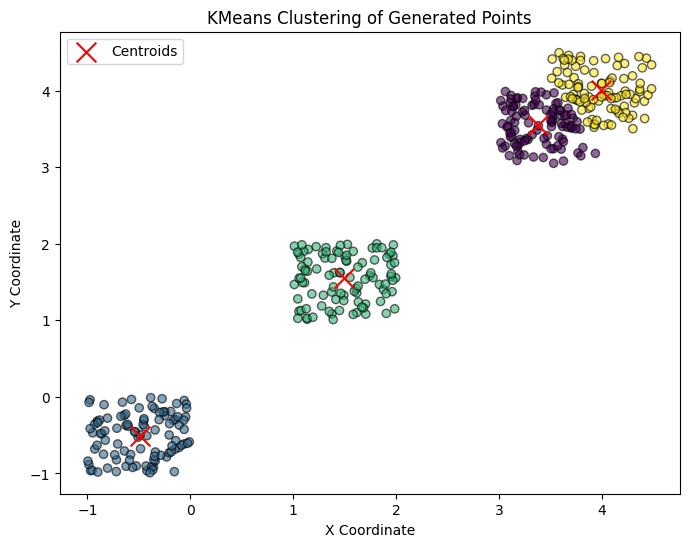

In [81]:
# Apply Kmeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("KMeans Clustering of Generated Points")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()

## Assignment 2.2
### Topic: K-Means clustering and plotting (2 points)

Perform **clustering** on the dataset using the `cluster` module of `scikit-learn` library
[k-means method](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html).

When using the **KMeans** algorithm, the number of possible clusters can be set in advance, but here the algorithm is run with defaults.

Additional tip you should try in this assignment:

The algorithm of the **KMeans** machine learning model can be tuned in a variety of ways (the same applies to other ML implementations of sklearn) by changing the parameters.

     KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)``

In [82]:
# Apply KMeans clustering with default parameters
kmeans = KMeans(n_clusters=2, random_state=None, init='k-means++', max_iter=300, n_init=10, tol=0.0001)
kmeans.fit(X)


KMeans(n_clusters=2, n_init=10)

Let's find the center points (**centroids**) of the clusters.
Hint: `cluster_centers_`

In [83]:
# TODO: Retrieve cluster centers (centroids)
centroids = kmeans.cluster_centers_

# The center points of the clusters and their number are printed out
num_centroids = len(centroids)
centroids_list = centroids.tolist()  # Convert to list for better readability
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 2 and positions: [[3.6746422  3.76758642]
 [0.50350191 0.52154601]]


Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated center points are plotted
Hint: `plt.scatter`

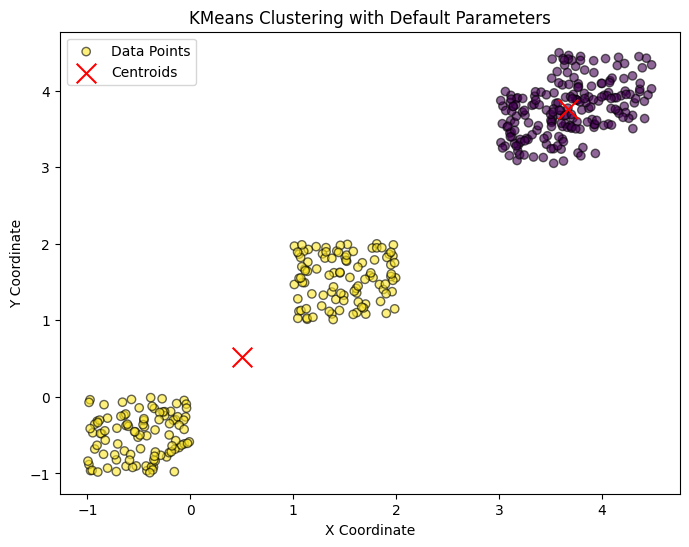

In [84]:
# TODO: Plot the points as a scatter plot
# TODO: plot the calculated centroids

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6, edgecolors='k', label="Data Points")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title("KMeans Clustering with Default Parameters")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()

## Assignment 2.3
### Topic: K-Means clustering - setting the number of cluster centroids (2 points)

Set the number of cluster centroids to *optimal number* of clusters.
The optimal number of clusters can be seen by examining the distribution of points using the figure.

In [85]:
from sklearn.metrics import silhouette_score

# TODO: Set the optimal number of clusters using the silhouette score
silhouette_scores = []
possible_clusters = range(2, 7) # Trying cluster sizes from 2 to 6

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', max_iter=300, n_init=10, tol=0.0001)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Find the best number of clusters
optimal_clusters = possible_clusters[np.argmax(silhouette_scores)]

# Apply KMeans clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, init='k-means++', max_iter=300, n_init=10, tol=0.0001)
kmeans_optimal.fit(X)

# TODO: Retrieving cluster centroids
centroids_optimal = kmeans_optimal.cluster_centers_

# The center points of the clusters and their number are printed
num_centroids_optimal = len(centroids_optimal)
centroids_list_optimal = centroids_optimal.tolist()
print(f"Number of centroids {num_centroids_optimal} and positions: {centroids_list_optimal}")

Number of centroids 3 and positions: [[1.4914109775259892, 1.5499345902258708], [3.6746421976413437, 3.7675864160406394], [-0.48440716506225545, -0.5068425633854665]]


#### Visualize: Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated centroids are plotted
Hint: `plt.scatter`

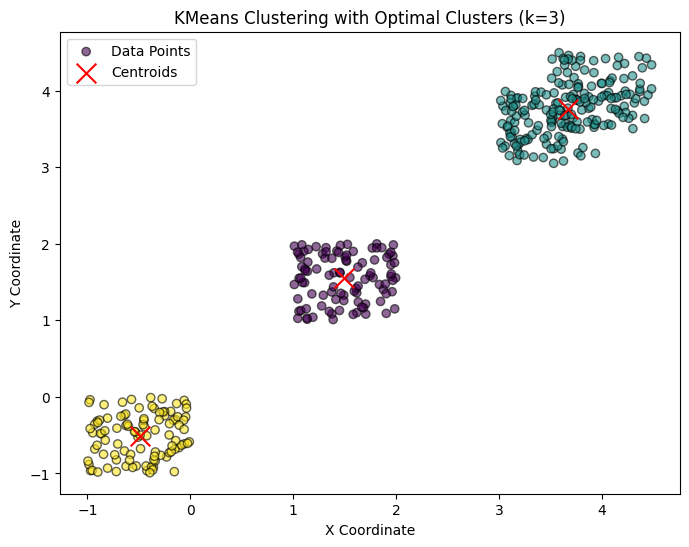

In [86]:
# TODO: Plot the points as a scatter plot
# TODO: plot the calculated centroids

# Plot clusters and centroids for the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_optimal.labels_, cmap='viridis', alpha=0.6, edgecolors='k', label="Data Points")
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f"KMeans Clustering with Optimal Clusters (k={optimal_clusters})")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()

## Assignment 2.4:
### Topic: Cluster distances as a line diagram (1 p)

Let's plot the average distances of the points of the clusters from the center of the cluster.
* implement the *k_mean_distance()* function given at the beginning of this document is used for drawing


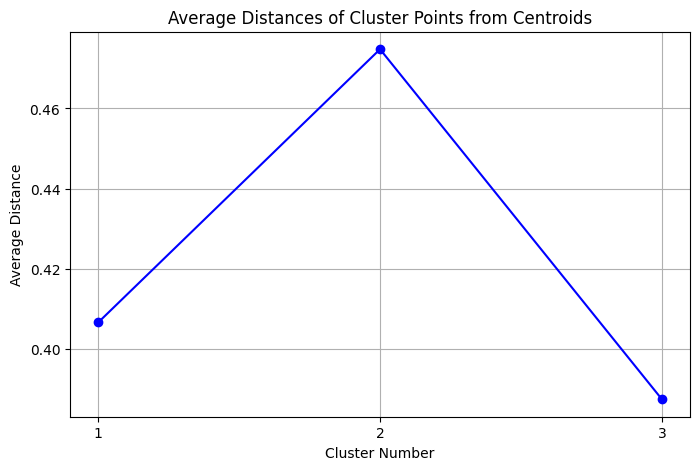

In [87]:
# Corrected function to calculate average distances of points from cluster centroids
def k_means_distance(data, labels, centroids):
    distances = []
    for i in range(len(centroids)):
        cluster_points = data[labels == i]  # Get points belonging to the cluster
        if len(cluster_points) > 0:  # Ensure there are points in the cluster
            centroid = centroids[i]
            distance = np.linalg.norm(cluster_points - centroid, axis=1)  # Compute Euclidean distance
            avg_distance = np.mean(distance)  # Compute the average distance
            distances.append(avg_distance)
        else:
            distances.append(0)  # Handle cases where no points are assigned to a cluster
    return distances

# Ensure labels are NumPy array for indexing
labels_array = np.array(kmeans_optimal.labels_)

# Calculate the average distances of points from cluster centroids
distances_from_center = k_means_distance(X, labels_array, centroids_optimal)

# Plot the distances as a line diagram
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(distances_from_center) + 1), distances_from_center, marker='o', linestyle='-', color='b')
plt.title("Average Distances of Cluster Points from Centroids")
plt.xlabel("Cluster Number")
plt.ylabel("Average Distance")
plt.xticks(range(1, len(distances_from_center) + 1))
plt.grid(True)
plt.show()